### קריאת הקובץ סידור יצירת עמודות רלוונטיות

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


In [62]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = pd.to_datetime(df['date_occurred']).apply(categorize_time)



In [36]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
    if age < 10:
        return "child"
    elif age < 18:
        return "teenager"
    elif age < 60:
        return "adult"
    else:
        return "old"


df["age_description"] = df["victim_age"].apply(age_category)


In [37]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'


df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)


In [56]:
## מוסיף עמודה חדשה שטח המקום בו קרה הפשע
df['crime_place_area'] = (df['latitude'] * df['longitude']).abs()
df.loc[df['crime_place_area'] == 0, 'crime_place_area'] = np.nan



### תרגום של העמודות

In [9]:
import pandas as pd


file_pt= r'C:\Users\Win10\Desktop\Columns_transltion.xlsx'


translating = pd.read_excel(file_pt)


last_three_columns = translating .iloc[:, -3:]


my_translation = last_three_columns.iloc[6:]

my_translation 

,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,משתנה,תיאור,סוג
7,division_number,מספר המחלקה של אירוע הפשע.,int
8,date_reported,התאריך שבו דווח הפשע.,datetime64[ns]
9,date_occurred,התאריך שבו התרחש הפשע.,datetime64[ns]
10,area,קוד האזור שבו התרחש אירוע הפשע.,int
11,area_name,שם האזור שבו התרחש אירוע הפשע.,object
12,reporting_district,אזור הדיווח של אירוע הפשע.,int
13,part,מספר החלק של אירוע הפשע.,int
14,crime_code,קוד המתאים לסוג הפשע.,int
15,crime_description,תיאור הפשע.,object


### קוד הפשע של כל פשע

In [5]:
crime_df = df[['crime_description', 'crime_code']]
crime_df = crime_df.drop_duplicates(subset=['crime_code'], keep='first')
crime_df

,crime_description,crime_code
0,BATTERY - SIMPLE ASSAULT,624
2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,845
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),745
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",740
5,"RAPE, FORCIBLE",121
...,...,...
241517,FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...,904
328691,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),830
472238,BLOCKING DOOR INDUCTION CENTER,432
532247,INCITING A RIOT,882


### פיצול הקובץ לקטגוריות

In [6]:
violence_df = df[df['crime_description'].isin(['BATTERY - SIMPLE ASSAULT',
                                         'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                         'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                         'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                         'ARSON',
                                         'INTIMATE PARTNER - SIMPLE ASSAULT',
                                         'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                         'BRANDISH WEAPON',
                                         'OTHER ASSAULT',
                                         'SHOTS FIRED AT INHABITED DWELLING',
                                         'KIDNAPPING - GRAND ATTEMPT',
                                         'DISCHARGE FIREARMS/SHOTS FIRED',
                                         'KIDNAPPING',
                                         'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                         'CRIMINAL HOMICIDE',
                                         'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                         'BATTERY ON A FIREFIGHTER',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                         'CRUELTY TO ANIMALS',
                                         'LYNCHING - ATTEMPTED',
                                         'MANSLAUGHTER, NEGLIGENT',
                                         'LYNCHING'])]
crime_list1 = [
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
    'THEFT PLAIN - PETTY ($950 & UNDER)',
    'ROBBERY',
    'BURGLARY',
    'VEHICLE - STOLEN',
    'BUNCO, GRAND THEFT',
    'THEFT OF IDENTITY',
    'BIKE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'EXTORTION',
    'CHILD STEALING',
    'ATTEMPTED ROBBERY',
    'PURSE SNATCHING',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'BUNCO, PETTY THEFT',
    'BUNCO, ATTEMPT',
    'THEFT PLAIN - ATTEMPT',
    'SHOPLIFTING - ATTEMPT',
    'THEFT FROM PERSON - ATTEMPT',
    'VEHICLE - ATTEMPT STOLEN',
    'BURGLARY FROM VEHICLE, ATTEMPTED',
    'PICKPOCKET',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'TILL TAP - PETTY ($950 & UNDER)',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'PETTY THEFT - AUTO REPAIR',
    'BOAT - STOLEN',
    'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN',
    'BRIBERY',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    'GRAND THEFT / INSURANCE FRAUD',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'GRAND THEFT / AUTO REPAIR',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

Thefts_and_frauds = df[df['crime_description'].isin(crime_list1)]

crime_list2 = [
    'RAPE, FORCIBLE',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
    'BATTERY WITH SEXUAL CONTACT',
    'LETTERS, LEWD - TELEPHONE CALLS, LEWD',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'INDECENT EXPOSURE',
    'ORAL COPULATION',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'PIMPING',
    'RAPE, ATTEMPTED',
    'CHILD PORNOGRAPHY',
    'PEEPING TOM',
    'PANDERING',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'
]


sex_crimes = df[df['crime_description'].isin(crime_list2)]



### בדיקת תקינות הנתונים

In [7]:
missing_values_by_column = df.isnull().sum()


result_df = pd.DataFrame({
    'column name': missing_values_by_column.index,
    'Amount of missing values': missing_values_by_column.values
})
missing_values_by_column 

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112616
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
day_time                    0
age_description             0
dtype: int64

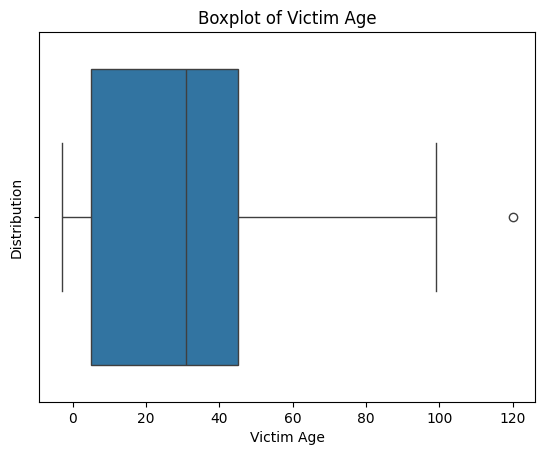

In [8]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [9]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [10]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [11]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


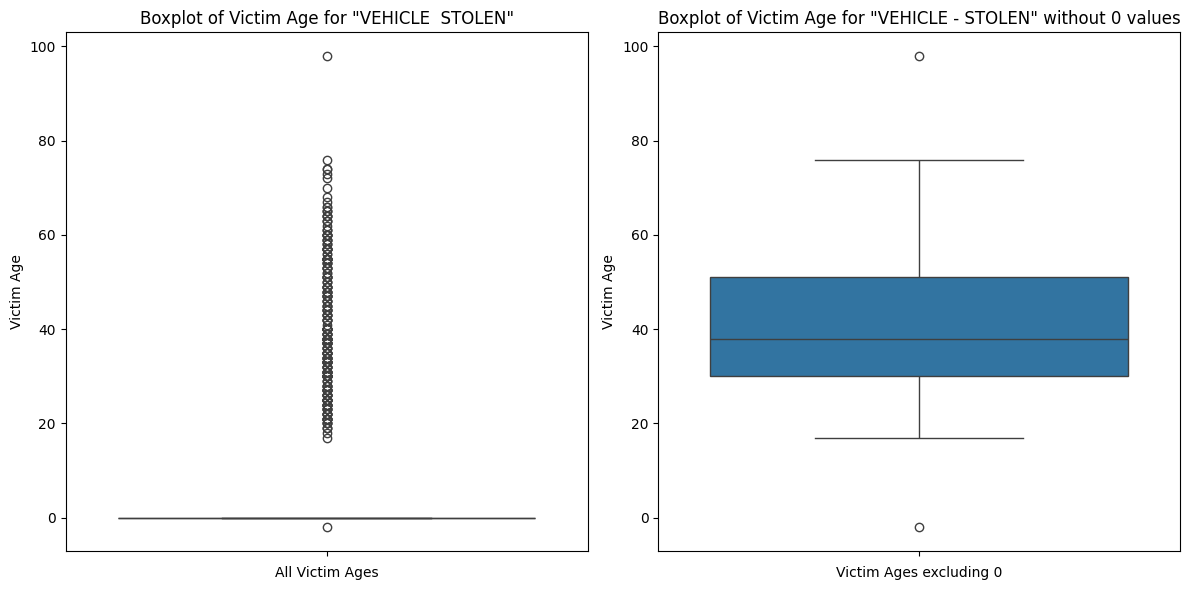

In [29]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [30]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

###  ריצחות והריגות

In [ ]:
violence_df
cod_crime = violence_df[['crime_description', 'crime_code']]
cod_crime = cod_crime.drop_duplicates(subset=['crime_code'], keep='first')

In [13]:
kiling_data = violence_df.loc[violence_df['crime_code'].isin([110, 111])]
kiling_data # דאטה על הרציחות 

victim_age_count = kiling_data['victim_age'].value_counts().reset_index()
victim_age_count.columns = ['Victim age','Number of murdered'] # דאטה רציחות לפי גיל

victim_sex_count = kiling_data['victim_sex'].value_counts().reset_index()
victim_sex_count.columns = ['Victim sex','Number of murdered'] #דאטה רציחות לפי מין 


area_count = kiling_data['area_name'].value_counts().reset_index()
area_count.columns = ['Area name','Number of murdered'] # דאטה רציחות לפי אזור

ethnicity_count = kiling_data['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Murder by ethnicity','Number of murdered'] # דאטה רציחות לפי מוצא אתני 

day_time_count = kiling_data['day_time'].value_counts().reset_index()
day_time_count.columns = ['Murders by time of day','Number of murdered'] # דאטה רציחות לפי זמן


C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')


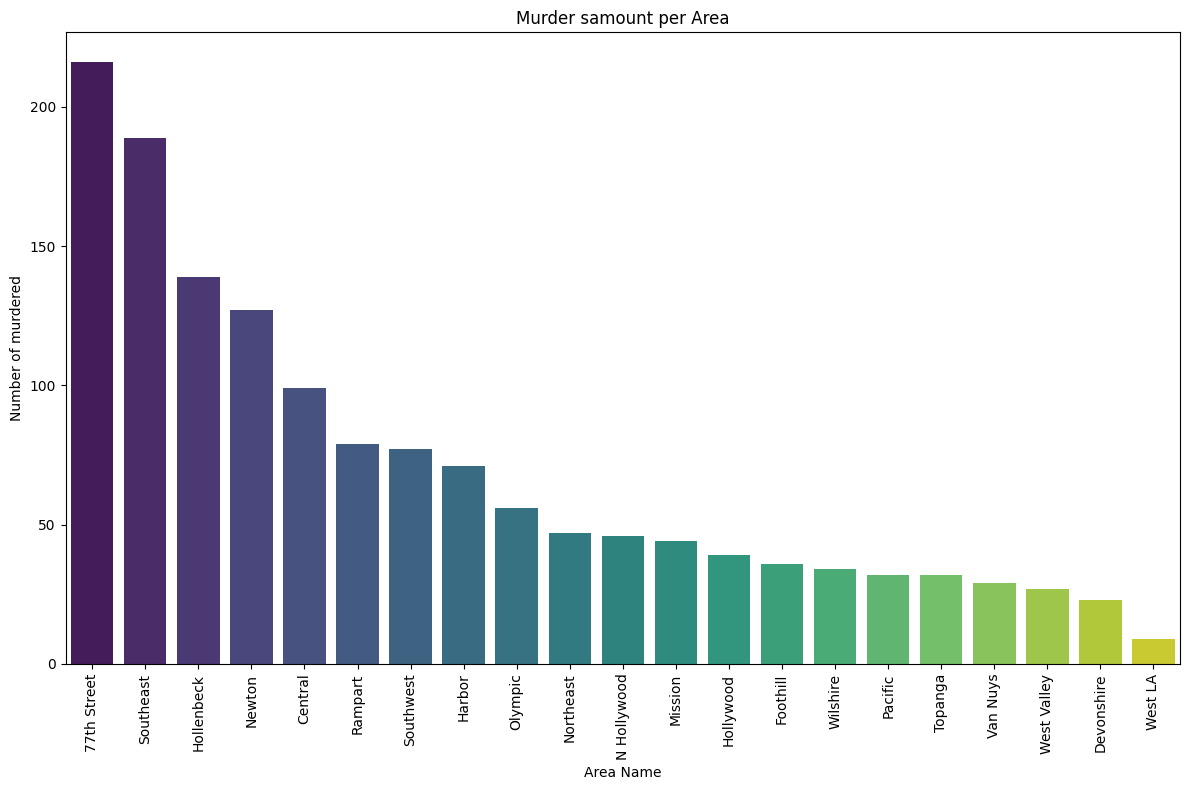

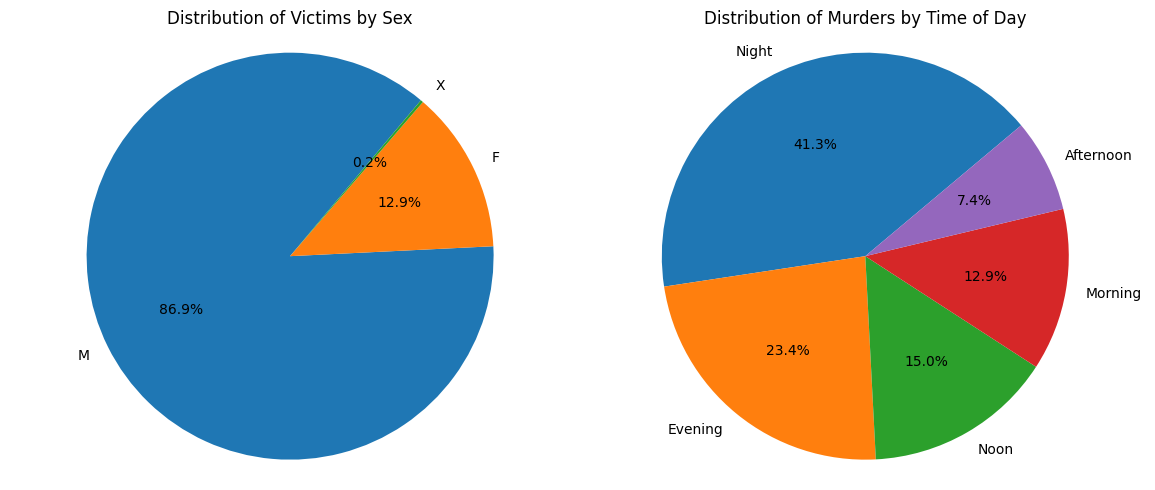

C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)


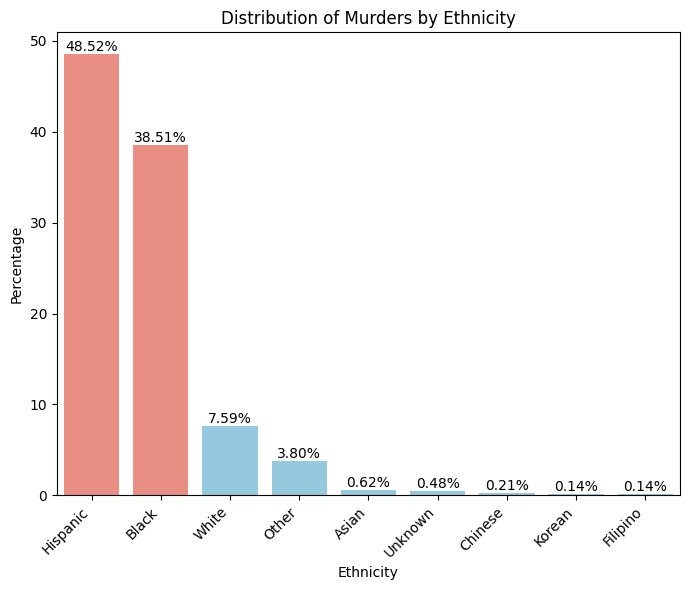

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')
plt.xlabel('Area Name')
plt.ylabel('Number of murdered')
plt.title('Murder samount per Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




victim_sex_count = kiling_data['victim_sex'].value_counts()
day_time_count = kiling_data['day_time'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(victim_sex_count, labels=victim_sex_count.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Victims by Sex')
plt.axis('equal')  

plt.subplot(1, 2, 2)
plt.pie(day_time_count, labels=day_time_count.index, autopct='%1.1f%%', startangle=40)
plt.title('Distribution of Murders by Time of Day')
plt.axis('equal')

plt.tight_layout()
plt.show()




total_murders = ethnicity_count['Number of murdered'].sum()


ethnicity_count['Percentage'] = (ethnicity_count['Number of murdered'] / total_murders) * 100


plt.figure(figsize=(7, 6))
colors = ['skyblue' if x <= ethnicity_count['Percentage'].mean() else 'salmon' for x in ethnicity_count['Percentage']]
plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)
plt.title('Distribution of Murders by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.show()



In [15]:
### מקומות בהם קראו מקרי רצח
pr = kiling_data['premise_description'].value_counts().reset_index()
pr.columns = ['premise description','Number of murdered']
pr.head(20)


,premise description,Number of murdered
0,STREET,533
1,SIDEWALK,259
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",148
3,PARKING LOT,107
4,SINGLE FAMILY DWELLING,107
5,ALLEY,54
6,PARK/PLAYGROUND,29
7,DRIVEWAY,26
8,"VEHICLE, PASSENGER/TRUCK",17
9,OTHER BUSINESS,11


In [35]:
### שימושיים בנשק בריצחות והריגות

In [21]:
use_of_weapons_data = kiling_data[kiling_data['weapon_description'].notna()]
frequency_of_use = use_of_weapons_data['weapon_description'].value_counts().reset_index()
frequency_of_use.columns = ['weapon_description','amount_of_uses']
frequency_of_use 

def sum_column_by_names(df, column_names):
    return frequency_of_use[frequency_of_use['weapon_description'].isin(column_names)]['amount_of_uses'].sum()

guns_sum = sum_column_by_names(frequency_of_use, ['HAND GUN', 'UNKNOWN FIREARM', 'SEMI-AUTOMATIC PISTOL', 'OTHER FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'STARTER PISTOL/REVOLVER', 'SEMI-AUTOMATIC RIFLE', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC'])

cold_weapon_sum = sum_column_by_names(frequency_of_use, ['UNKNOWN WEAPON/OTHER WEAPON', 'OTHER KNIFE', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'KNIFE WITH BLADE 6INCHES OR LESS', 'KITCHEN KNIFE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'FOLDING KNIFE', 'OTHER CUTTING INSTRUMENT', 'BLUNT INSTRUMENT', 'HAMMER', 'CLUB/BAT', 'SWITCH BLADE', 'SCISSORS', 'BOTTLE', 'SCREWDRIVER', 'MACHETE', 'AXE', 'DIRK/DAGGER'])

improvised_weapon_sum = sum_column_by_names(frequency_of_use, ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'PIPE/METAL PIPE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BOTTLE', 'BOARD', 'ANTIQUE FIREARM'])

ignition_or_run_over_sum = sum_column_by_names(frequency_of_use, ['VEHICLE', 'FIRE'])

something_else_sum = sum_column_by_names(frequency_of_use, ['VERBAL THREAT', 'SCALDING LIQUID', 'EXPLOXIVE DEVICE', 'LIQUOR/DRUGS'])

new_df = pd.DataFrame({'guns': [guns_sum],
                       'cold weapon': [cold_weapon_sum],
                       'An improvised weapon': [improvised_weapon_sum],
                       'ignition or run over': [ignition_or_run_over_sum],
                       'Something else': [something_else_sum]})

new_df

,guns,cold weapon,An improvised weapon,ignition or run over,Something else
0,1075,253,99,18,4


### עברות ביום לפי זמנים ביום

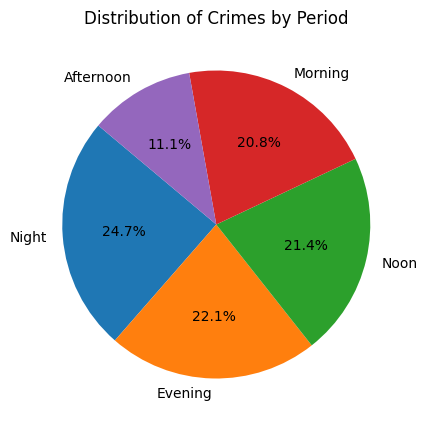

In [43]:
day_time_count = df['day_time'].value_counts().reset_index()
day_time_count.columns = ['crimes by time of day','Number of crimes']
day_time_count
plt.figure(figsize=(5,5))
plt.pie(day_time_count['Number of crimes'], labels=day_time_count['crimes by time of day'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Period')
plt.show()

### קורבנות לפי מוצע אתני

In [41]:
ethnicity_count = df['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Crime by ethnicity','Number of crime']
ethnicity_count

,Crime by ethnicity,Number of crime
0,Hispanic,261145
1,White,173440
2,Black,120896
3,Unknown,83214
4,Other,67532
5,Asian,18700
6,Korean,4579
7,Filipino,3580
8,Chinese,3313
9,Japanese,1181


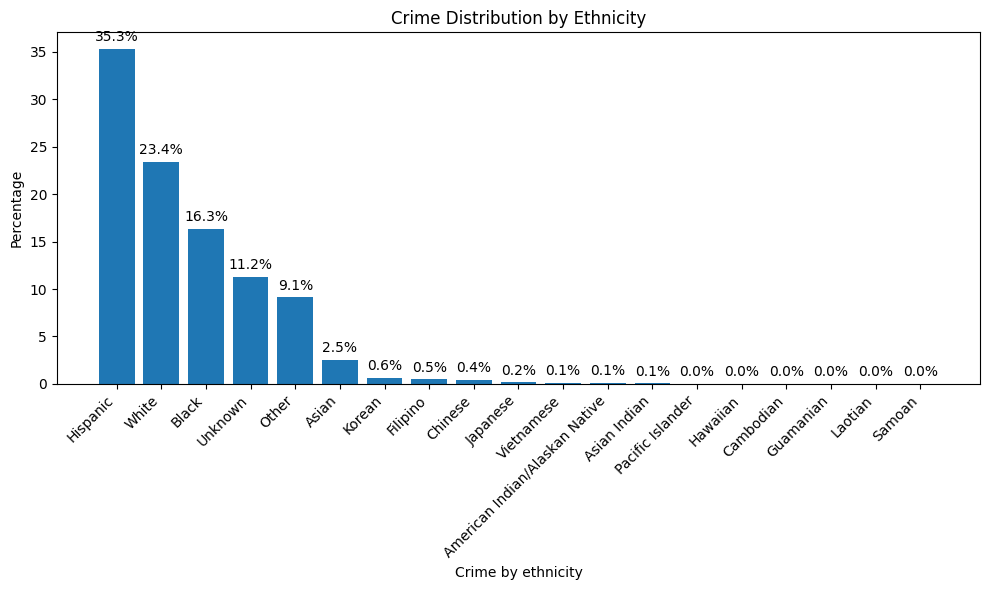

In [42]:

ethnicity_count = df['victim_descent'].value_counts(normalize=True).reset_index()
ethnicity_count.columns = ['Crime by ethnicity', 'Percentage']


ethnicity_count = ethnicity_count[ethnicity_count['Percentage'] != 0]


plt.figure(figsize=(10, 6))
plt.bar(ethnicity_count['Crime by ethnicity'], ethnicity_count['Percentage'] * 100)
plt.title('Crime Distribution by Ethnicity')
plt.xlabel('Crime by ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')


for i, percentage in enumerate(ethnicity_count['Percentage']):
    plt.text(i, percentage * 100 + 0.5, f'{percentage*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
crime_description_count_df = crime_description_count.to_frame().reset_index()
crime_description_count_df.columns = ['crime_description', 'count']
crime_description_count_df.head(20)

NameError: name 'crime_description_count' is not defined

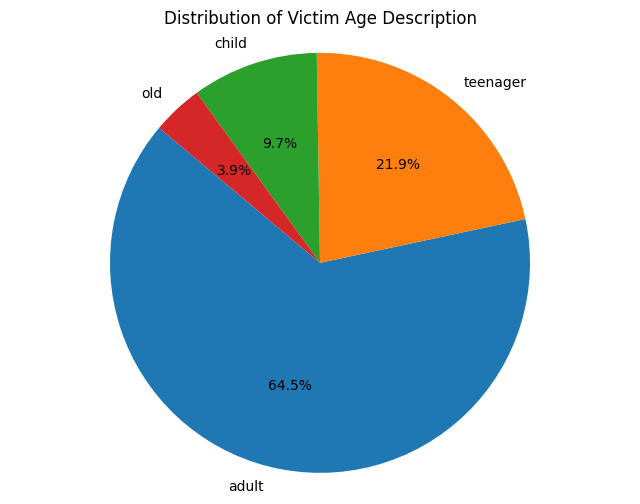

In [45]:
age_counts = sex_crimes["age_description"].value_counts()



plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Age Description')
plt.axis('equal') 
plt.show()

###  פשעים נגד ילדים ונערים

In [47]:
## כאן דווקא כן נוריד את הגיל 0 כדי לבנות פרופיל אמין יותר לילדים

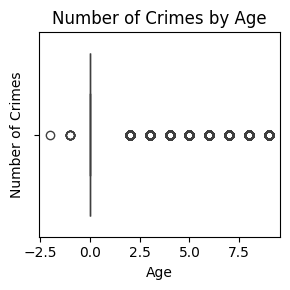

In [7]:
child_df = violence_df[violence_df["age_description"] == "child"]
child_description = child_df['crime_description'].value_counts()
child_description
child_df
age_counts = child_df['victim_age'].value_counts()

plt.figure(figsize=(3,3))


sns.boxplot(x='victim_age', data=child_df)
plt.title('Number of Crimes by Age') 
plt.xlabel('Age') 
plt.ylabel('Number of Crimes')  
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()
### לא ניקח בחשבון את הערכים שווים או קטנים מ0

In [8]:
filtered_violence_df = violence_df[(violence_df['age_description'].isin(['child', 'teenager'])) & (violence_df['victim_age'] >= 1)]
crime_description_counts = filtered_violence_df['crime_description'].value_counts().to_frame().reset_index()
crime_description_counts.columns = ['Violence against children/teenegres', 'count']
total_crime_description_count = crime_description_counts['count'].sum()


crime_description_counts.loc[len(crime_description_counts)] = ['Total', total_crime_description_count]
crime_description_counts





,Violence against children/teenegres,count
0,BATTERY - SIMPLE ASSAULT,3558
1,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,3041
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2102
3,CRIMINAL THREATS - NO WEAPON DISPLAYED,722
4,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,475
5,BRANDISH WEAPON,460
6,INTIMATE PARTNER - SIMPLE ASSAULT,436
7,OTHER ASSAULT,135
8,SHOTS FIRED AT INHABITED DWELLING,108
9,KIDNAPPING - GRAND ATTEMPT,94


In [9]:
###  ניתן לראות שאומנם אחוז האלימות נגד ילדים מהווים אחוז מינורי למות מקרי האלימות באופן כללי
### אך עדיין מדובר על למעלה מ11445 מקרים בשלוש שנים וזה יוצא יותר מעשרה מקרים ליום דבר שווה להתייחס אליו
## לא לשכוח לעשות גרף התפלגות אלימות נגד כל הגילאים

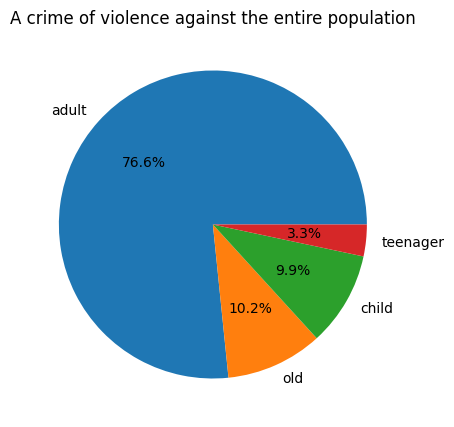

In [10]:
plt.figure(figsize=(5,5))
violence_df['age_description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('A crime of violence against the entire population')
plt.ylabel('')
plt.show()


In [11]:
### אומנם מדובר פה על אחוז קטן של ילדים ונערים כ13.2 אחוז ביחד אך עדיין מדובר פה על יותר מ11,000 מקרים דבר ששווה התייחסת

In [12]:
### מקומות נפוצים בהם קרו פשעי אלימות נגד קטינים וילדים
premise_counts_violence = filtered_violence_df['premise_description'].value_counts().reset_index()
premise_counts_violence.columns = ["place_description", "amount"]
premise_counts_violence.head(20)

,place_description,amount
0,SINGLE FAMILY DWELLING,2805
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2073
2,STREET,2007
3,SIDEWALK,968
4,HIGH SCHOOL,597
5,JUNIOR HIGH SCHOOL,508
6,PARKING LOT,359
7,PARK/PLAYGROUND,250
8,ELEMENTARY SCHOOL,177
9,OTHER BUSINESS,125


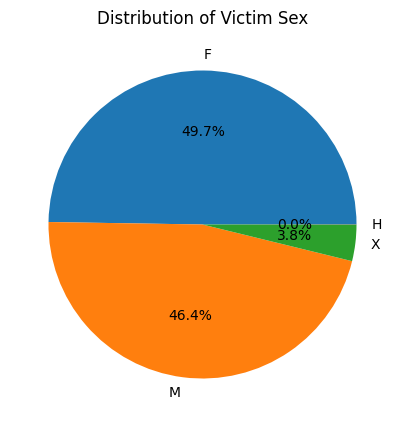

,victim_sex,amount
0,F,11213
1,M,10466
2,X,859
3,H,3


In [120]:
male_or_female = filtered_violence_df['victim_sex'].value_counts().reset_index()
male_or_female.columns = ['victim_sex', 'amount']

plt.figure(figsize=(5,5))
plt.pie(male_or_female['amount'], labels=male_or_female['victim_sex'], autopct='%1.1f%%')
plt.title('Distribution of Victim Sex')
plt.show()
male_or_female

In [55]:
### התפלגות מקרי האלימות בקרב בני הנוער וילדים בין זכרים לנקבות כמעט שווה לחלוטין

In [13]:


def add_location_category(df):
    """
    Add a new column 'Location_Category' to the DataFrame based on the values of 'premise_description'.
    """
   
    conditions = [
        df['premise_description'].isin(["SINGLE FAMILY DWELLING", "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)", "OTHER RESIDENCE"]),
        df['premise_description'].str.contains("SCHOOL"),
        ~df['premise_description'].str.contains("SCHOOL")
    ]

    # Define corresponding categories
    categories = ['Home', 'School', 'Another place outside the house']

    # Add the new column based on conditions
    df['Location_Category'] = np.select(conditions, categories, default='Unknown')

add_location_category(filtered_violence_df)


C:\Users\Win10\AppData\Local\Temp\ipykernel_12184\3944430703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location_Category'] = np.select(conditions, categories, default='Unknown')


In [31]:
home_or_school = filtered_violence_df["Location_Category"].value_counts().reset_index()
home_or_school.columns = ["Location","amount"]
home_or_school


,Location,amount
0,Another place outside the house,5112
1,Home,4943
2,School,1390


##### באותו אופןן נבדוק מה קורה כאשר מתבצע נגד ילדים פשעי מין

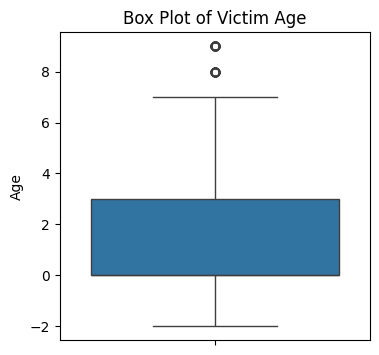

In [70]:
child_data = sex_crimes[sex_crimes["age_description"]== "child"]
child_data["victim_age"]
plt.figure(figsize=(4,4))
sns.boxplot(y=child_data["victim_age"])
plt.title('Box Plot of Victim Age')
plt.ylabel('Age')
plt.show()


In [91]:
chek = sex_crimes[(sex_crimes['victim_age'] == 0) & (sex_crimes['victim_sex'].notna())]
chek_description_counts = chek['victim_descent'].value_counts().reset_index()
chek_description_counts.columns = ['victim_descent', 'count']
print(chek_description_counts)

without_unknown = sex_crimes[(sex_crimes['victim_age'] == 0) & (sex_crimes['victim_descent']!= "Unknown")]

chek2_description_sex = without_unknown ['victim_sex'].value_counts().reset_index()
chek2_description_sex.columns = ['victim_sex',"count"]
chek2_description_sex

### נוריד את כל מי שגילו שווה ל0 ומוצאו לא ידוע



  victim_descent  count
0        Unknown    673
1          Other    115
2          White     71
3       Hispanic     58
4          Black     32
5          Asian      5


,crime_descriptiont,count
0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,182
1,BATTERY WITH SEXUAL CONTACT,25
2,PANDERING,20
3,INDECENT EXPOSURE,16
4,"RAPE, FORCIBLE",12
5,CHILD PORNOGRAPHY,8
6,PEEPING TOM,5
7,PIMPING,3
8,ORAL COPULATION,3
9,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",3


In [93]:
children_and_teenagers = sex_crimes[
    (sex_crimes['victim_age'] >= 0) & 
    (sex_crimes['age_description'].isin(['child', 'teenager'])) & 
    (sex_crimes['victim_descent'] != 'Unknown') ]


crime_description_counts = children_and_teenagers['crime_description'].value_counts().to_frame().reset_index()
crime_description_counts.columns = ['Sexual crimes against children/teenagers', 'count']

total_crime_description_count = crime_description_counts['count'].sum()


crime_description_counts.loc[len(crime_description_counts)] = ['Total', total_crime_description_count]
crime_description_counts



,Sexual crimes against children/teenagers,count
0,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",885
1,BATTERY WITH SEXUAL CONTACT,723
2,"RAPE, FORCIBLE",679
3,SEXUAL PENETRATION W/FOREIGN OBJECT,358
4,ORAL COPULATION,244
5,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,182
6,INDECENT EXPOSURE,155
7,CHILD PORNOGRAPHY,118
8,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,108
9,PEEPING TOM,40


In [ ]:
### בסהכ בשלושת השנים האחרונות בקראו כ3572 פשעי מין נגד ילדים מתחת לגיל 18 יותר משלושה מקרים בממוצע ליום

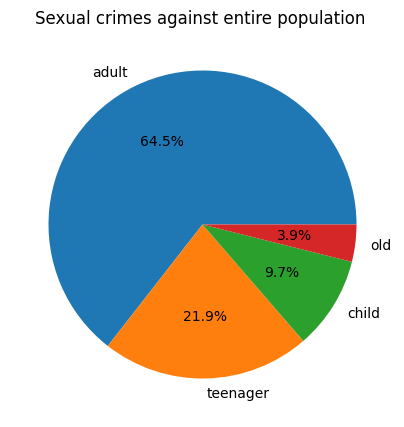

In [94]:
plt.figure(figsize=(5,5))
sex_crimes['age_description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sexual crimes against entire population ')
plt.ylabel('')  
plt.show()

In [ ]:
# כאן האחוז של הילדים ווהנערים שמהווים קורבנות לפשעי מין הוא יותר רציני 31.6 אחוז מכלל המקרים

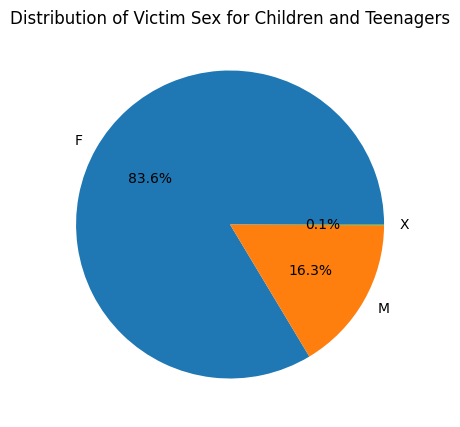

,victim_sex,amount
0,F,2983
1,M,582
2,X,3


In [95]:
m_or_f = children_and_teenagers['victim_sex'].value_counts().reset_index()
m_or_f.columns = ['victim_sex', 'amount']

plt.figure(figsize=(5,5))
plt.pie(m_or_f['amount'], labels=m_or_f['victim_sex'], autopct='%1.1f%%')
plt.title('Distribution of Victim Sex for Children and Teenagers')
plt.show()
m_or_f

In [96]:
### מקומות נפוצים בהם נעשים פשיעי מין נגד ילדים וקטינים
premise_counts_sex = children_and_teenagers['premise_description'].value_counts().reset_index()
premise_counts_sex.columns = ["place_description", "amount"]
premise_counts_sex.head(20)

,place_description,amount
0,SINGLE FAMILY DWELLING,1236
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",668
2,STREET,295
3,HIGH SCHOOL,211
4,JUNIOR HIGH SCHOOL,145
5,POLICE FACILITY,138
6,PARK/PLAYGROUND,94
7,SIDEWALK,83
8,"VEHICLE, PASSENGER/TRUCK",79
9,PARKING LOT,61


In [97]:
add_location_category(children_and_teenagers)

C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\3944430703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location_Category'] = np.select(conditions, categories, default='Unknown')


In [98]:
h_or_s = children_and_teenagers['Location_Category'].value_counts().reset_index()
h_or_s.columns = ["Location", "amount"]
h_or_s

,Location,amount
0,Home,1920
1,Another place outside the house,1236
2,School,416


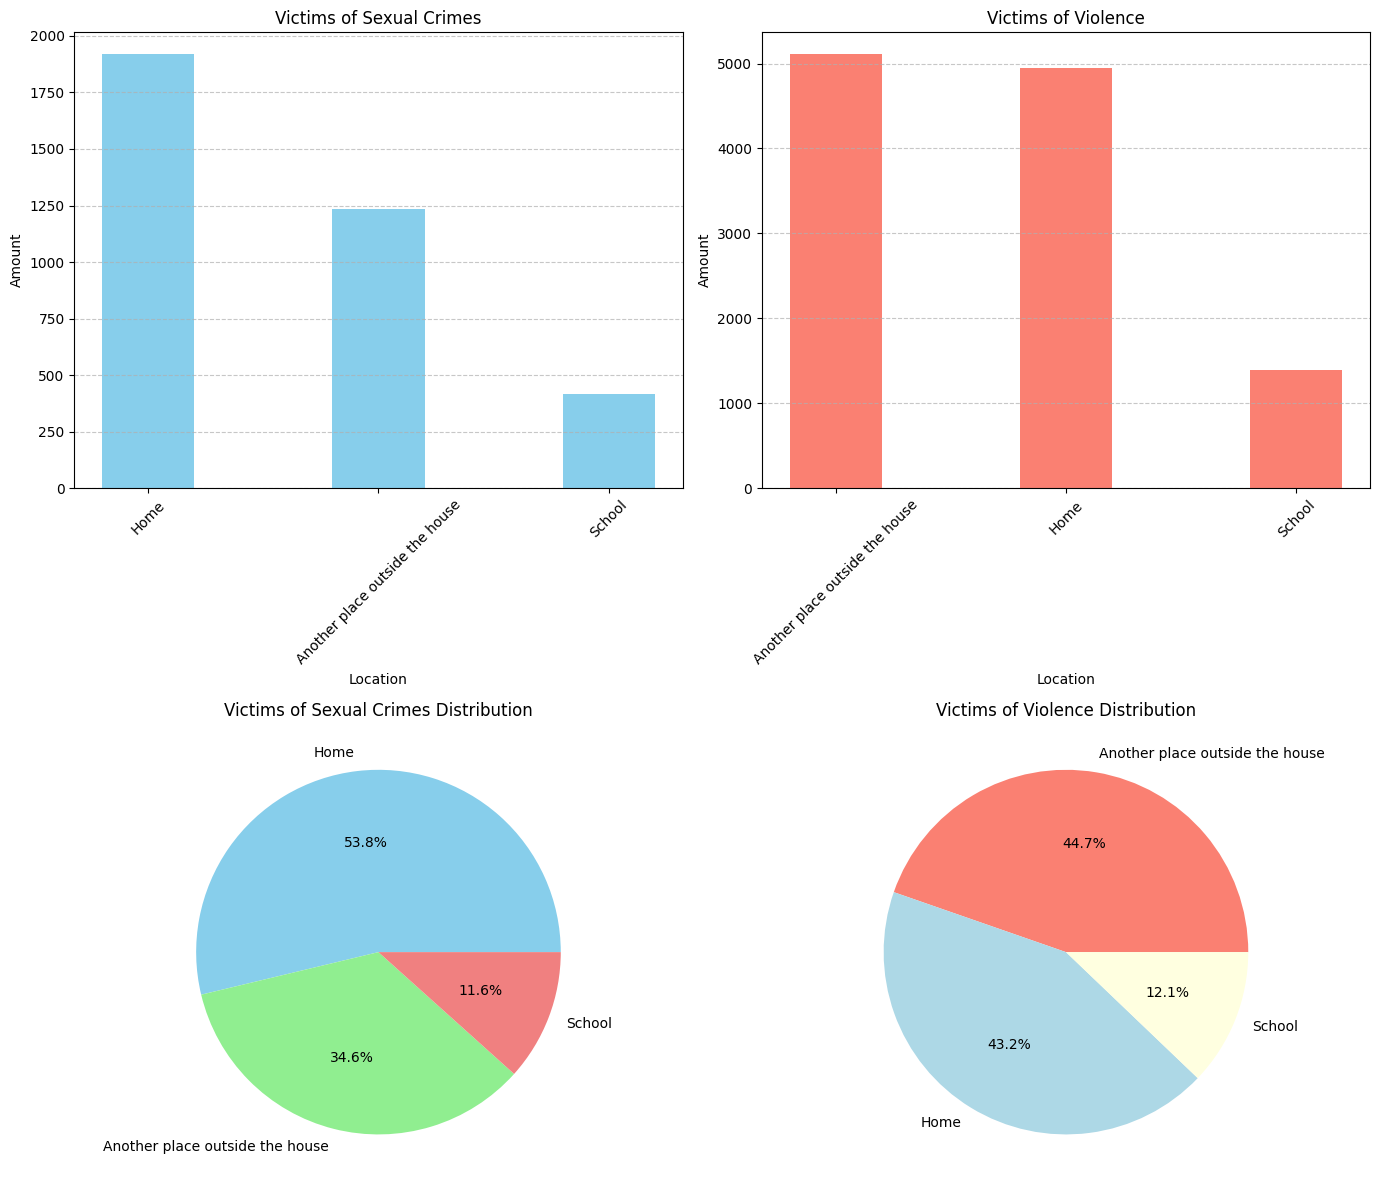

In [99]:
h_or_s = children_and_teenagers['Location_Category'].value_counts().reset_index()
h_or_s.columns = ["Location", "amount"]

# יצירת DataFrame של ספירת ההתרחשויות של כל קטגוריית מיקום עבור אלימות
home_or_school = filtered_violence_df["Location_Category"].value_counts().reset_index()
home_or_school.columns = ["Location", "amount"]

# הגדרות עבור עמודות
bar_width = 0.4

# יצירת גרף עמודות ודיאגרמות עוגה
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# גרף עמודות עבור פשעי מין
axes[0, 0].bar(h_or_s['Location'], h_or_s['amount'], color='skyblue', width=bar_width)
axes[0, 0].set_title('Victims of Sexual Crimes')
axes[0, 0].set_xlabel('Location')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].set_xticks(range(len(h_or_s['Location'])))
axes[0, 0].set_xticklabels(h_or_s['Location'], rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# גרף עמודות עבור אלימות
axes[0, 1].bar(home_or_school['Location'], home_or_school['amount'], color='salmon', width=bar_width)
axes[0, 1].set_title('Victims of Violence')
axes[0, 1].set_xlabel('Location')
axes[0, 1].set_ylabel('Amount')
axes[0, 1].set_xticks(range(len(home_or_school['Location'])))
axes[0, 1].set_xticklabels(home_or_school['Location'], rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# דיאגרמת עוגה עבור פשעי מין
axes[1, 0].pie(h_or_s['amount'], labels=h_or_s['Location'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[1, 0].set_title('Victims of Sexual Crimes Distribution')

# דיאגרמת עוגה עבור אלימות
axes[1, 1].pie(home_or_school['amount'], labels=home_or_school['Location'], autopct='%1.1f%%', colors=['salmon', 'lightblue', 'lightyellow'])
axes[1, 1].set_title('Victims of Violence Distribution')

# סידור הגרפים
plt.tight_layout()
plt.show()

##### מסקנה 1 
כשהתחלנו לחקור את את הדאטה באופן ממוקד תוך כדי מתן דגש על פשעי אלימות ופשעי מין נגד ילדים ונערים,כל חברי הקבוצה היו באותה דעה
כולם ללא יוצא מן הכלל חשבו שאחוז האלימות בקרב בני הנוער והילדים יהיה גבוה ברבה כאשר מדובר בזכרים,הופתענו לגלות שהתפלגות האחוזים כמעט שווה 
בני נוער וילדים זכרים מהווים כ49.4 מכלל הקורבנות ובנות נוערת וילדות נקבות מהוות כ49.3 מכל הקרבנות

מה שהפתיע אותנו עוד יותר כאשר חקרנו על הנושא זה עצם העבודה שאחוז מאוד של מקרים קראו כאשר הקורבנות היו בביתם מה שיכול להצביע על מגמה מדאיגה מאוד 
                      של אלימות במשפחה כ53.8 אחוז מכלל הקורבנות בקרב ילדים וילדות נערים ונערות אשר היו קורבנות לפשעי מין היו בבית בזמן המעשה
                                                              כ43.2 מכלל הקורבנות שהיו קורבן לפשעי אלימות היו בבית בזמן ביצוע הפשע    




כדי לסבר את האוזן בספרים ולא באחוזים מתוך 3568 מקרים של פשעי מין נגד בני נוער וילדים 1920 קראו כאשר הקורבנות היו בבית
מתוך 11445 מקריםשל אלימות פיזית נגד בני נוער וילדים 4943 קראו כבר הקורבנות היו בבית

מסקנה שסהכ היו6863 מקרים של אלימות פיזית או מינית בקרב ילדים ובני נוער בלוס אנג'לס כאשר הקורבנות היו בבית בין השנים 2020 ל2023 
יותר משישה מקרים ליום בממוצע כמו שכבר אמרנו דבר זה יכול להצביע על מגמה מדאיגה מאוד של אלימות במשפחה 

### פשעים לפי עונות השנה

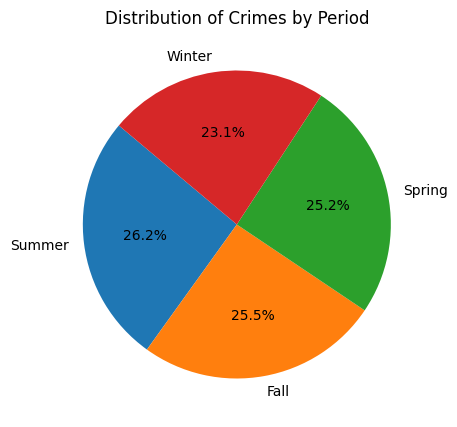

,priod,amount_crime
0,Summer,223392
1,Fall,217565
2,Spring,214844
3,Winter,197149


In [26]:
### נצייג שכאן לא נוריד שום פשע מכיוון שאנו רוצים לדעת על כלל הפשעים
priod_df = df["period_occurre"].value_counts().reset_index()
priod_df.columns = ["priod","amount_crime"]

plt.figure(figsize=(5,5))
plt.pie(priod_df['amount_crime'], labels=priod_df['priod'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Period')
plt.show()
priod_df


##### הצפלגות כמעט אחידה עבור כלל הפשעים בכל עונה

### חדש

In [57]:
## נחפש קשרים בין מקומות צפופים יותר לעבירות מסויימות